In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import material
import cross_section
import beam_element
import structure
import solver

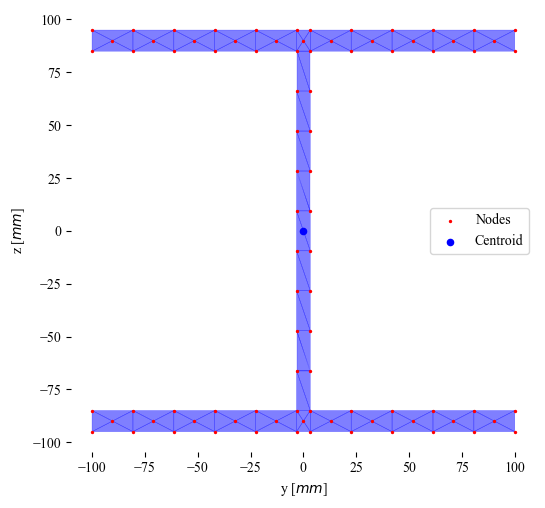

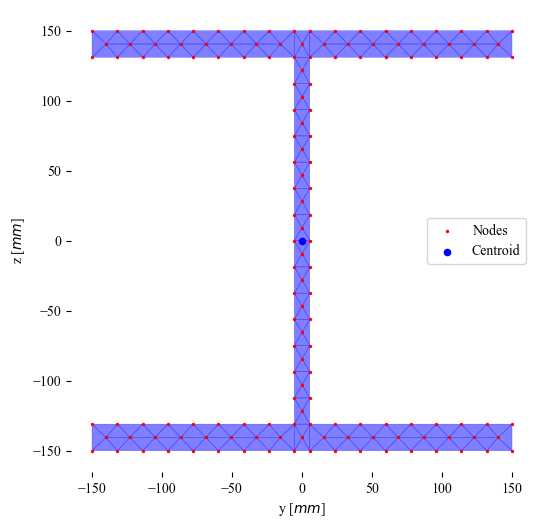

In [2]:
HEA_200 = H_beam(web_width     =   6.5,
                 web_height    = 170.0,
                 flange_width  = 200.0,
                 flange_height =  10.0)
beam = Mesh(HEA_200, mesh_type="triangle", mesh_size=20)
beam.plot()

HEB_300 = H_beam(web_width     =  11.0,
                 web_height    = 262.0,
                 flange_width  = 300.0,
                 flange_height =  19.0)
column = Mesh(HEB_300, mesh_type="triangle", mesh_size=20)
column.plot()


In [3]:
struc = structure.Frame(column            = column, 
						beam              = beam, 
						number_of_stories = 1, 
						story_height      = 3000, 
						story_width       = 7000, 
						number_of_sections_per_elemnt = 4)

In [4]:
non_linear_solver = solver.Nonlinear(struc, 
									 constraint="Displacement", 
									 NR_tolerance=1e-6, 
									 NR_max_iter=10, 
									 section_tolerance=1e-6, 
									 section_max_iter=100)

In [5]:
increments = np.zeros(21)
increments.fill(1.0)

u_history, lambda_history = non_linear_solver.solve(increments)

  0%|          | 0/21 [00:00<?, ?it/s]

----------------------------------------------
Load step 1 of 21
   Attempt  1
      NR Iteration  0
         Beam Element  0
            Element iteration  0
                  section unbalanced forces norm: 1.1185476574588233e-08
                  Cross section converged
                  section unbalanced forces norm: 7.500950956419385e-09
                  Cross section converged
                  section unbalanced forces norm: 1.8890116938418157e-09
                  Cross section converged
                  section unbalanced forces norm: 5.963115827810196e-10
                  Cross section converged
Det K:  1.472766013799956e+48
         Beam Element  0  converged
         Beam Element  1
            Element iteration  0
                  section unbalanced forces norm: 1.8970147299151193e-09
                  Cross section converged
                  section unbalanced forces norm: 2.3879326071269836e-10
                  Cross section converged
                  section unb

-9.0 -124683.55947878442
22
0.0
-13853.72883097607
-27707.457661952114
-41561.18649292816
-55414.9153239042
-69268.64415488024
-83122.37298585627
-96976.10181683235
-110829.83064780837
-124683.55947878442
-138537.28830976045
-152391.01714073648
-166244.74597171252
-180098.47480268858
-193952.20363366464
-207805.93246464067
-221659.6612956167
-235513.39012659274
-249367.1189575688
-263220.84778854484
-277074.5766195209
-277074.5766195209


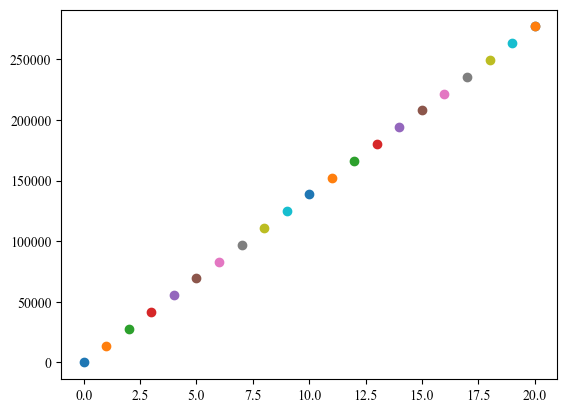

In [6]:
print(u_history[9][6*2], lambda_history[9])
print(len(lambda_history))
for i in range(len(lambda_history)):
	plt.scatter(-u_history[i][6*2], -lambda_history[i])
	print(lambda_history[i])